Libraries

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Data importing

In [96]:
fifa20=pd.read_csv('players_20.csv',index_col='sofifa_id')
fifa20.head(10)

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,91,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,90,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,90,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3


First drop useless columns

# Analysis  for Goalkeepers

In [118]:
goalkeepers=fifa20[fifa20['player_positions']=='GK']
gk_data=goalkeepers[['short_name','age','height_cm','weight_kg','nationality','overall']]
gk_data.sort_values(by='overall',ascending=False,inplace=True)
gk_data


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,short_name,age,height_cm,weight_kg,nationality,overall
sofifa_id,,,,,,
200389,J. Oblak,26,188,87,Slovenia,91
192448,M. ter Stegen,27,187,85,Germany,90
212831,Alisson,26,191,91,Brazil,89
193080,De Gea,28,192,82,Spain,89
210257,Ederson,25,188,86,Brazil,88
...,...,...,...,...,...,...
245542,G. Figliuzzi,18,184,83,Italy,49
252151,V. Storsve,17,185,65,Norway,48
245408,G. Sykes-Kenworthy,19,182,78,England,48


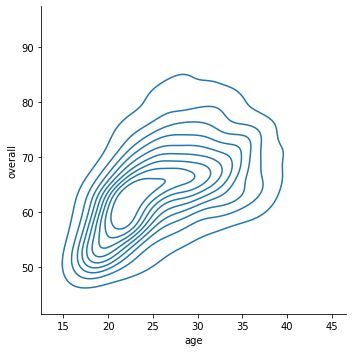

In [98]:
sns.displot(gk_data,x='age',y='overall',kind='kde')

In [99]:
gk_data.describe()

,age,height_cm,weight_kg,overall
count,2036.000000,2036.000000,2036.000000,2036.000000
mean,26.266699,188.437623,81.960216,64.796660
std,5.373800,4.602375,6.196685,7.603627
min,17.000000,171.000000,60.000000,48.000000
25%,22.000000,185.000000,78.000000,60.000000
50%,26.000000,188.000000,82.000000,65.000000
75%,30.000000,191.000000,86.000000,70.000000
max,42.000000,205.000000,107.000000,91.000000


In [100]:
#oldest goalkeeper in fifa20
oldest_gk=gk_data[gk_data['age']==42]
oldest_gk

,short_name,age,height_cm,weight_kg,nationality,overall
sofifa_id,,,,,,
142998,C. Muñoz,42,177,73,Argentina,64


Nationlity count

In [101]:
nationality=gk_data.nationality.value_counts()[:-1]
nationality

England              170
Germany              161
Spain                113
France               103
Italy                102
                    ... 
Burkina Faso           1
Equatorial Guinea      1
Georgia                1
Mali                   1
Philippines            1
Name: nationality, Length: 89, dtype: int64

In [102]:
#sns.pairplot(gk_data)

## Analysis for players in England team

In [104]:
eng20=fifa20.groupby(by='nationality').get_group('England')
eng20.columns[1:18]
eng20=eng20[['short_name','age','height_cm','weight_kg','club','overall','value_eur','player_positions','preferred_foot']]
eng20


,short_name,age,height_cm,weight_kg,club,overall,value_eur,player_positions,preferred_foot
sofifa_id,,,,,,,,,
202126,H. Kane,25,188,89,Tottenham Hotspur,89,83000000,ST,Right
202652,R. Sterling,24,170,69,Manchester City,88,73000000,"RW, LW",Right
233049,J. Sancho,19,180,76,Borussia Dortmund,84,44500000,"RM, LM",Right
211117,D. Alli,23,188,80,Tottenham Hotspur,84,41500000,"CAM, CM",Right
188377,K. Walker,29,183,70,Manchester City,84,25500000,RB,Right
...,...,...,...,...,...,...,...,...,...
250739,N. Morley,18,178,60,Burton Albion,48,60000,CB,Right
252548,C. Heath,18,188,78,Crewe Alexandra,48,60000,CM,Right
241493,S. Cartwright,18,185,75,Peterborough United,48,60000,"CB, RB",Right


In [105]:
ST=eng20.groupby('player_positions').get_group('ST')
over70_st=ST[ST['overall']>=70]
over70_st

,short_name,age,height_cm,weight_kg,club,overall,value_eur,player_positions,preferred_foot
sofifa_id,,,,,,,,,
202126,H. Kane,25,188,89,Tottenham Hotspur,89,83000000,ST,Right
208830,J. Vardy,32,179,74,Leicester City,82,17500000,ST,Right
196978,C. Wilson,27,180,66,Bournemouth,80,17500000,ST,Right
54050,W. Rooney,33,176,83,DC United,80,9500000,ST,Right
183125,T. Deeney,31,183,90,Watford,78,9500000,ST,Right
186905,A. Barnes,29,186,84,Burnley,78,10500000,ST,Right
221479,D. Calvert-Lewin,22,187,71,Everton,77,12500000,ST,Right
164464,B. Wright-Phillips,34,173,75,New York Red Bulls,77,4700000,ST,Right
172937,G. Murray,35,183,80,Brighton & Hove Albion,77,4100000,ST,Right


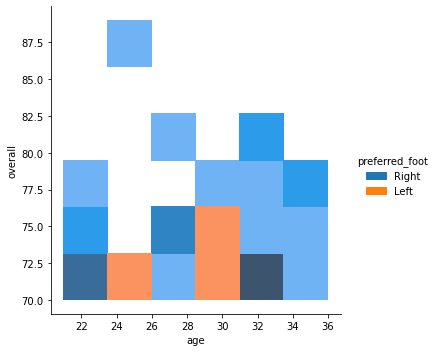

In [106]:
sns.displot(x='age',y='overall',data=over70_st,hue='preferred_foot')

<BarContainer object of 32 artists>

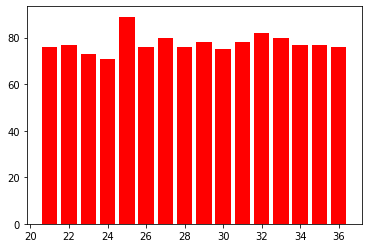

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(over70_st['age'],over70_st['overall'],color='r')

In [108]:
over70_st.describe()

,age,height_cm,weight_kg,overall,value_eur
count,32.000000,32.000000,32.000000,32.000000,3.200000e+01
mean,28.281250,182.125000,77.593750,74.625000,8.463281e+06
std,4.636701,6.110541,7.378519,4.278604,1.429121e+07
min,21.000000,171.000000,65.000000,70.000000,9.250000e+05
25%,24.750000,178.000000,71.000000,71.000000,2.875000e+06
50%,29.000000,183.000000,78.500000,74.000000,4.400000e+06
75%,32.000000,186.250000,83.250000,77.000000,9.125000e+06
max,36.000000,196.000000,90.000000,89.000000,8.300000e+07


In [109]:
cb=eng20.groupby('player_positions').get_group('CB')
over70_cb=cb[cb['overall']>=70]
over70_cb

,short_name,age,height_cm,weight_kg,club,overall,value_eur,player_positions,preferred_foot
sofifa_id,,,,,,,,,
203574,J. Stones,25,188,70,Manchester City,83,30000000,CB,Right
203263,H. Maguire,26,194,100,Manchester United,82,23000000,CB,Right
207599,M. Keane,26,191,82,Everton,80,16500000,CB,Right
189881,C. Smalling,29,194,81,Manchester United,80,12500000,CB,Right
202695,J. Tarkowski,26,192,81,Burnley,79,14000000,CB,Right
194957,P. Jones,27,185,71,Manchester United,79,12500000,CB,Right
203487,J. Lascelles,25,188,89,Newcastle United,78,12000000,CB,Right
199915,L. Dunk,27,192,88,Brighton & Hove Albion,78,11000000,CB,Right
173546,J. Tomkins,30,192,74,Crystal Palace,78,8500000,CB,Right


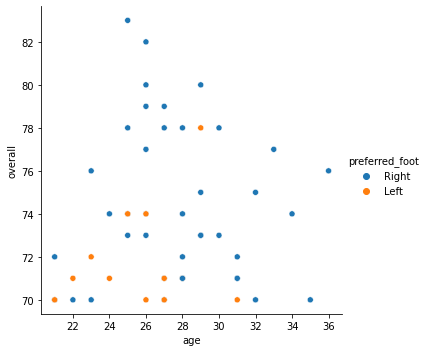

In [110]:
sns.relplot(x='age',y='overall',data=over70_cb,hue='preferred_foot')

In [111]:
eng20.groupby('player_positions').count()

,short_name,age,height_cm,weight_kg,club,overall,value_eur,preferred_foot
player_positions,,,,,,,,
CAM,12,12,12,12,12,12,12,12
"CAM, CDM, CM",1,1,1,1,1,1,1,1
"CAM, CF, ST",1,1,1,1,1,1,1,1
"CAM, CM",23,23,23,23,23,23,23,23
"CAM, CM, LM",2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
"ST, RM, RWB",1,1,1,1,1,1,1,1
"ST, RW",9,9,9,9,9,9,9,9
"ST, RW, LM",1,1,1,1,1,1,1,1


In [112]:
import sklearn
from sklearn import linear_model


In [113]:
reg=linear_model.LinearRegression()
reg.fit(eng20[['age','overall']],eng20['value_eur'])

LinearRegression()

In [114]:
eng20

,short_name,age,height_cm,weight_kg,club,overall,value_eur,player_positions,preferred_foot
sofifa_id,,,,,,,,,
202126,H. Kane,25,188,89,Tottenham Hotspur,89,83000000,ST,Right
202652,R. Sterling,24,170,69,Manchester City,88,73000000,"RW, LW",Right
233049,J. Sancho,19,180,76,Borussia Dortmund,84,44500000,"RM, LM",Right
211117,D. Alli,23,188,80,Tottenham Hotspur,84,41500000,"CAM, CM",Right
188377,K. Walker,29,183,70,Manchester City,84,25500000,RB,Right
...,...,...,...,...,...,...,...,...,...
250739,N. Morley,18,178,60,Burton Albion,48,60000,CB,Right
252548,C. Heath,18,188,78,Crewe Alexandra,48,60000,CM,Right
241493,S. Cartwright,18,185,75,Peterborough United,48,60000,"CB, RB",Right


In [115]:
reg.predict([[23,70]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([5035852.4956954])

## Young players


In [116]:
young_players = fifa20[fifa20['age']<=20]
promising=young_players.head(50)
promising.groupby('nationality').count()


,player_url,short_name,long_name,age,dob,height_cm,weight_kg,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
nationality,,,,,,,,,,,,,,,,,,,,,
Argentina,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Brazil,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Denmark,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
England,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
France,11,11,11,11,11,11,11,11,11,11,...,10,10,10,10,10,10,10,10,10,10
Germany,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Greece,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Italy,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
Korea Republic,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


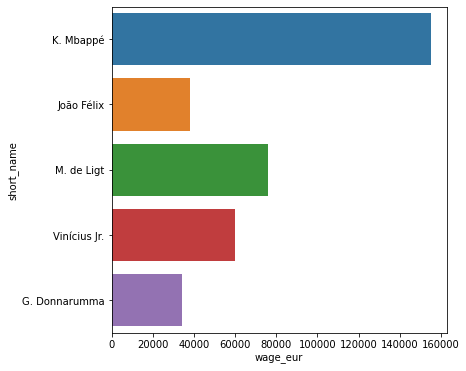

In [117]:
young_potential = young_players.sort_values(by=['potential','value_eur'],ascending=[False,True])[0:5]
plt.figure(figsize=(6,6))
sns.barplot(y='short_name',x='wage_eur',data=young_potential)

So, Kylian Mbappe, Vinicius Jr, De Ligt, Joao Felix are players who have huge potential in future.